## Project: Analyzing character constellations in a drama


In [ ]:
#pip install pydracor #beispiele: https://pypi.org/project/pydracor/

## Collect the most important information about our play: Using PyDraCor

In [ ]:
from pydracor import *

In [ ]:
dracor = DraCor()

In [ ]:
print(str(dracor)) #also: dracor.summary()

In [ ]:
play = Play(play_name='weidmann-johann-faust')

In [ ]:
play.summary()

In [ ]:
play.get_cast()

In [ ]:
cast = play.get_cast()
cast_list = []

for name in cast:
    cast_list.append(name["name"])
print(cast_list)

In [ ]:
character_name = input("Enter a name of a specific character...")

character = Character("mephistopheles", "ger000014")
character.summary()

In [ ]:
play.play_info()

In [ ]:
play.metrics()

In [ ]:
#calculate the metric for each node
data = play.metrics()

input_value = input("Enter closeness, eigenvector, degree, betweennes or weighted_degree...\n\n")
if input_value == "closeness":
    print("this measure calculates the shortest paths between all nodes, then assigns each node a score based on its sum of shortest paths. ")
elif input_value == "eigenvector":
    print("eigenCentrality can identify nodes with influence over the whole network, not just those directly connected to it")
elif input_value == degree:
    print("number of connections a node has to other nodes in the network")
elif input_value == "betweenness":
    print("betweenness centrality measures the number of times a node lies on the shortest path between other nodes.")
elif input_value == "weighted_degree":
    print("strength of a node (its weight according to its degree)")
print()


def get_value(node):
    return node[input_value]

sorted_nodes = sorted(data['nodes'], key=get_value, reverse=True)

for node in sorted_nodes:
    print(f'name: {node["id"]}, {input_value}: {node[input_value]}')

In [ ]:
print('average_degree:', data['average_degree'])
print('density:', data['density'])
print('average_clustering:', data['average_clustering'])
print('max_degree_ids=name:', data['max_degree_ids'])
print('max_degree:', data['max_degree'])
print('num_edges:', data['num_edges'])
print('average_path_length:', data['average_path_length'])

definitions:
- degree: number of connections a node has to other nodes in the network
- betweenness: betweenness centrality measures the number of times a node lies on the shortest path between other nodes.
- closeness: this measure calculates the shortest paths between all nodes, then assigns each node a score based on its sum of shortest paths.  
- eigenvector: eigenCentrality can identify nodes with influence over the whole network, not just those directly connected to it
- density: graph density represents the ratio between the edges present in a graph and the maximum number of edges that the graph can contain. 
- weighted degree: strength of a node (its weight according to its degree)


https://cambridge-intelligence.com/keylines-faqs-social-network-analysis/

https://www.baeldung.com/cs/graph-density

https://www.sciencedirect.com/topics/mathematics/weighted-degree

## Network analysis using networkx

In [ ]:
import networkx as nx

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_agraph import to_agraph 

from IPython.display import Image, display

# Just a little helper function to plot graphs, see section on NetworkX below for further information.
def plot_graph(graph):
    # Detect weights for edges and set them as labels
    has_weights = False
    if any(map(lambda edge: "weight" in graph.edges[edge], graph.edges)):
        for edge in graph.edges:
            edge_attrs = graph.edges[edge]
            weight = edge_attrs.get("weight", None)
            edge_attrs["label"] = weight
            has_weights = True
    
    # First, try graphviz backup as it produces cleaner plots
    # It requires both 'graphviz' and 'pygraphviz' installed.
    try:
        a = to_agraph(graph)
        a.layout('dot') 
        return display(Image(a.draw(format="png")))
    # Fallback to matplotlib backend if graphviz isn't accessible.
    except Exception:
        
        fig, ax = plt.subplots(figsize=(24, 18)) #changing size to make it completely visible -> play with params
        pos=nx.spring_layout(graph)
        nx.draw_networkx(graph, pos=pos, ax=ax)
        if has_weights:
            labels = nx.get_edge_attributes(graph,'weight')
            nx.draw_networkx_edge_labels(graph, pos=pos, edge_labels=labels, ax=ax)
        fig.tight_layout()   
        plt.savefig("networks.png", format="PNG") #saving graph as png added
        plt.show()

In [ ]:
#path = "/home/sid/data_science_seminar02/vorlesung04/" #linux
path = "C:/Users/Simon/seminar_datascience02/vorlesung04/"
#path = input("Please insert your path here...")
file_network = "ger000014-weidmann-johann-faust-network.graphml"
file_relations = "ger000014-weidmann-johann-faust-relations.graphml"

In [ ]:
network = nx.read_graphml(path+file_network)

In [ ]:
nodes = list(network.nodes)
print(nodes)

In [ ]:
edges = list(network.edges)
print(edges)

In [ ]:
plot_graph(network)

### Degree

In [ ]:
from operator import itemgetter

graph = nx.Graph()
graph.add_edges_from(edges)
num_edges = graph.number_of_edges()
print("Count all edges:", num_edges) #counts all edges (=kanten)

print()

degree = graph.degree()
edge_counts = dict(sorted(degree, key=itemgetter(1), reverse=True))
for key, value in edge_counts.items():
    print(key, value)

### Degree Centrality

In [ ]:
import networkx as nx

graph = nx.Graph()
graph.add_edges_from(edges)

degree = nx.centrality.degree_centrality(graph)

edge_counts = dict(sorted(degree.items(), key=itemgetter(1), reverse=True))
for node, score in edge_counts.items():
    print(f"name: {node}, score: {score}")

### Betweenness

In [ ]:
import networkx as nx

graph = nx.Graph()
graph.add_edges_from(edges)

betweenness_centrality = nx.betweenness_centrality(graph)

edge_counts = dict(sorted(betweenness_centrality.items(), key=itemgetter(1), reverse=True))
for node, score in edge_counts.items():
    print(f"name: {node}, score: {score}")

### Closeness

In [ ]:
import networkx as nx

graph = nx.Graph()
graph.add_edges_from(edges)

closeness = nx.closeness_centrality(graph)

edge_counts = dict(sorted(closeness.items(), key=itemgetter(1), reverse=True))
for node, score in edge_counts.items():
    print(f"name: {node}, score: {score}")

# Relations

In [ ]:
def plot_graph(graph):
    # Detect weights for edges and set them as labels
    has_weights = False
    if any(map(lambda edge: "weight" in graph.edges[edge], graph.edges)):
        for edge in graph.edges:
            edge_attrs = graph.edges[edge]
            weight = edge_attrs.get("weight", None)
            edge_attrs["label"] = weight
            has_weights = True
    
    # First, try graphviz backup as it produces cleaner plots
    # It requires both 'graphviz' and 'pygraphviz' installed.
    try:
        a = to_agraph(graph)
        a.layout('dot') 
        return display(Image(a.draw(format="png")))
    # Fallback to matplotlib backend if graphviz isn't accessible.
    except Exception:
        
        fig, ax = plt.subplots(figsize=(24, 18)) #changing size to make it completely visible -> play with params
        pos=nx.spring_layout(graph)
        nx.draw_networkx(graph, pos=pos, ax=ax)
        if has_weights:
            labels = nx.get_edge_attributes(graph,'weight')
            nx.draw_networkx_edge_labels(graph, pos=pos, edge_labels=labels, ax=ax)
        fig.tight_layout()   
        plt.savefig("relations.png", format="PNG") #saving graph as png added
        plt.show()

In [ ]:
relations = nx.read_graphml(path+file_relations)
plot_graph(relations)

**Relations explained from the (taken personae page of the drama):**

- Theodor, Fausts Vater
- Elisabeth, Fausts Mutter
- Helena, Fausts Geliebte
- Eduard, Helenas Sohn
- Wagner, Fausts Kammerdiener

#### In comparison: see the version of dracor.org

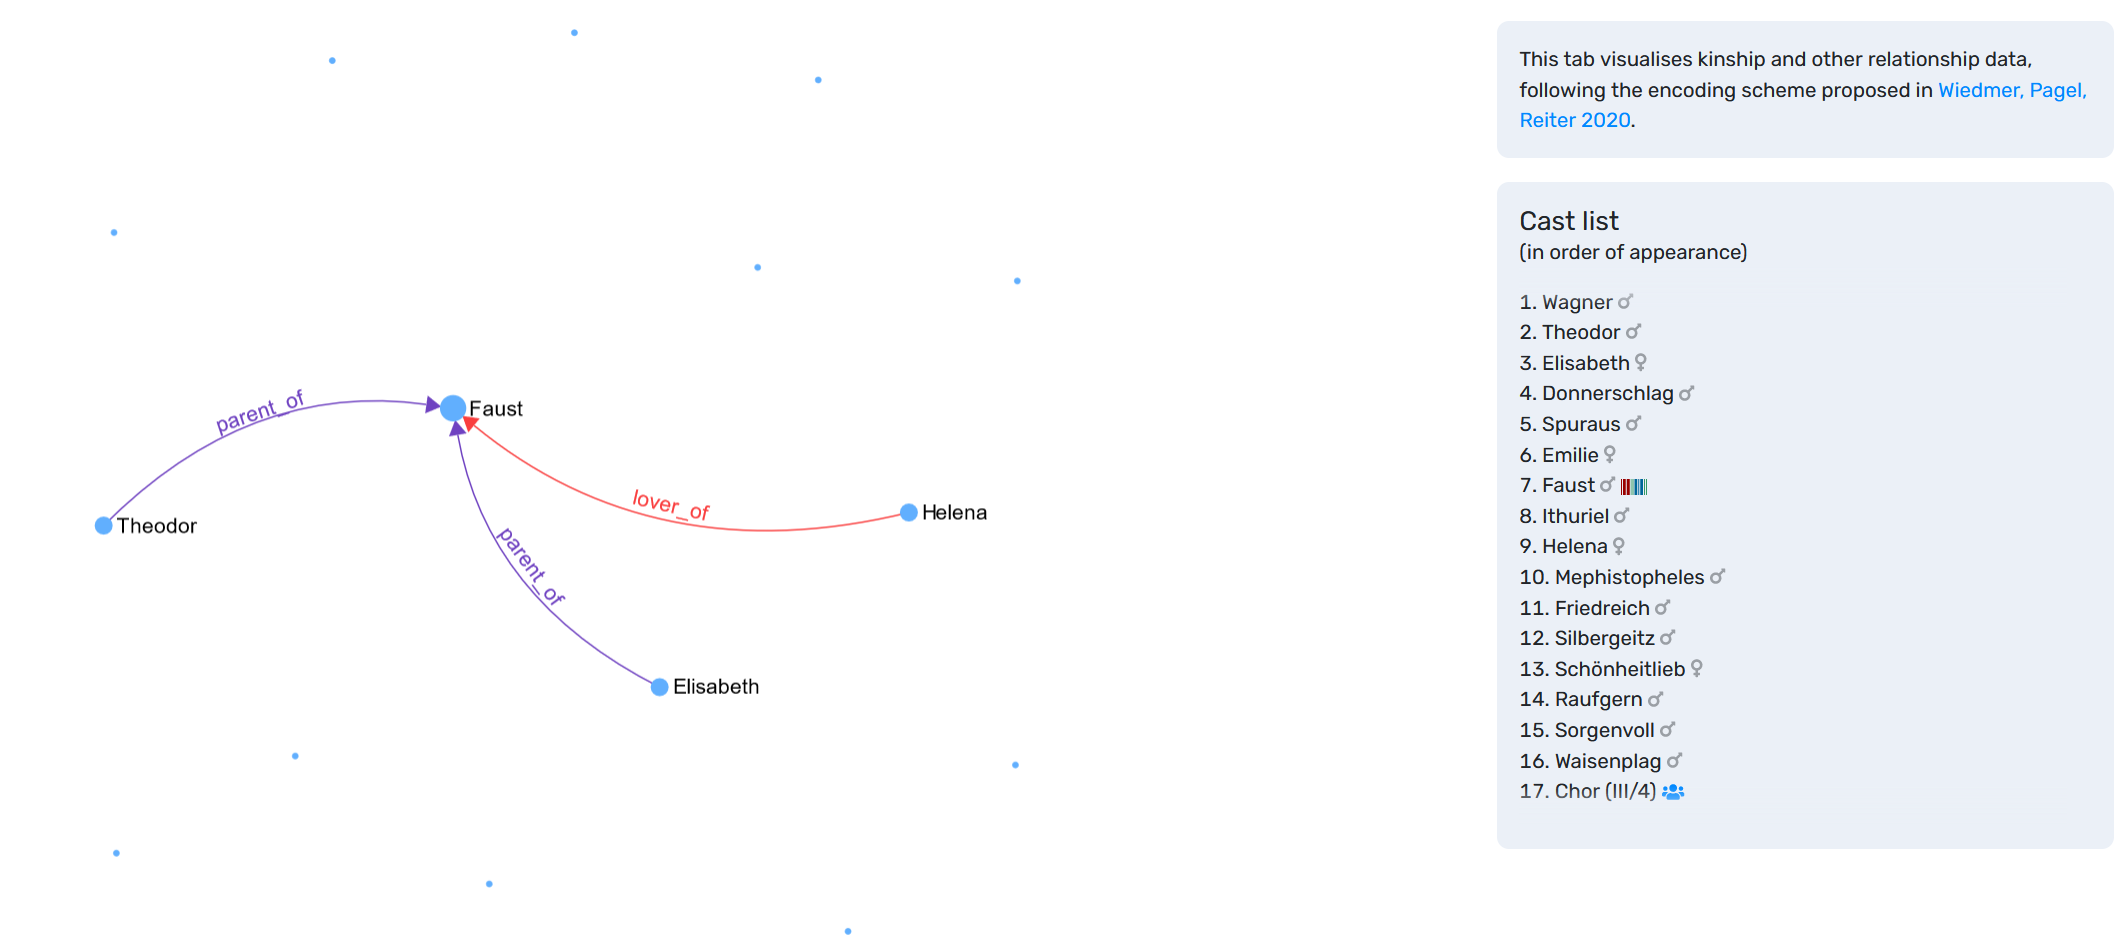

### Issues & Solutions

I always got the error "NetworkXError: directed=true edge found in undirected graph". A modification to a diGraph() of the code for the function "plot_graph" didn't change the problem. The only solution that came to my mind was to modify the xml-file. Within the xml-file I set the attribute "directed=True" to "directed=False" (see image below). As we can see that solved the problem and we got our overview of the significant relations in our play "Johann Faust" by Paul Weidmann.

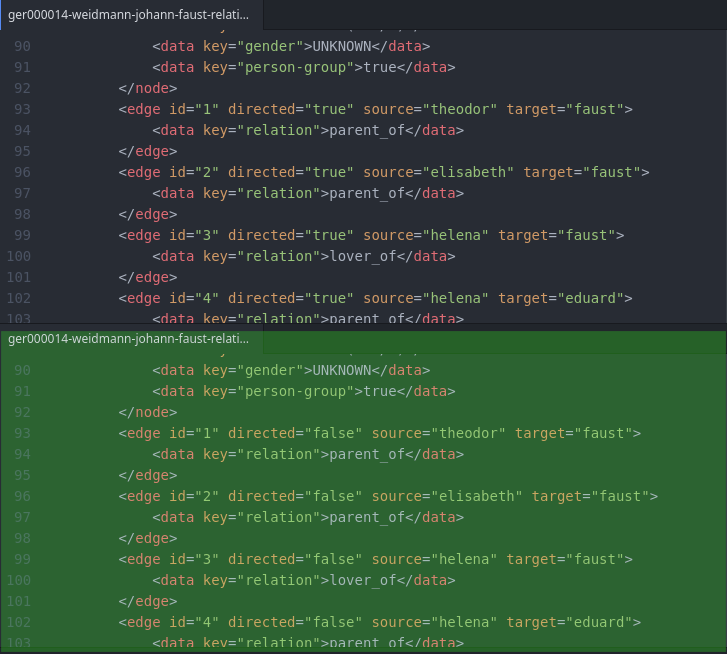